
# Predicting health risks for pregnant patients


Many pregnant women die from pregnancy issues as a result of a lack of information on maternal health care during and after pregnancy. It is more common in rural regions and among lower-middle-class families in emerging countries. During pregnancy, every minute should be observed to ensure the proper growth of the baby and the safe delivery.



### I used 4 algorithms classification:


*   Decision Tree
*   KNN (K Nearest Neighbors)
*   SVM (Support Vector Machine
*   Random Forest 



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00639/Maternal%20Health%20Risk%20Data%20Set.csv')

In [ ]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [ ]:
df.shape

(1014, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


# EDA (Exploratory Data Analysis)

In [ ]:
df.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

In [ ]:
df['RiskLevel'].unique()

array(['high risk', 'low risk', 'mid risk'], dtype=object)

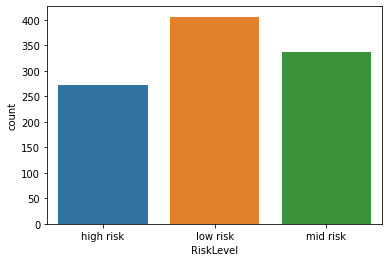

In [ ]:
sns.countplot(data=df, x = 'RiskLevel')

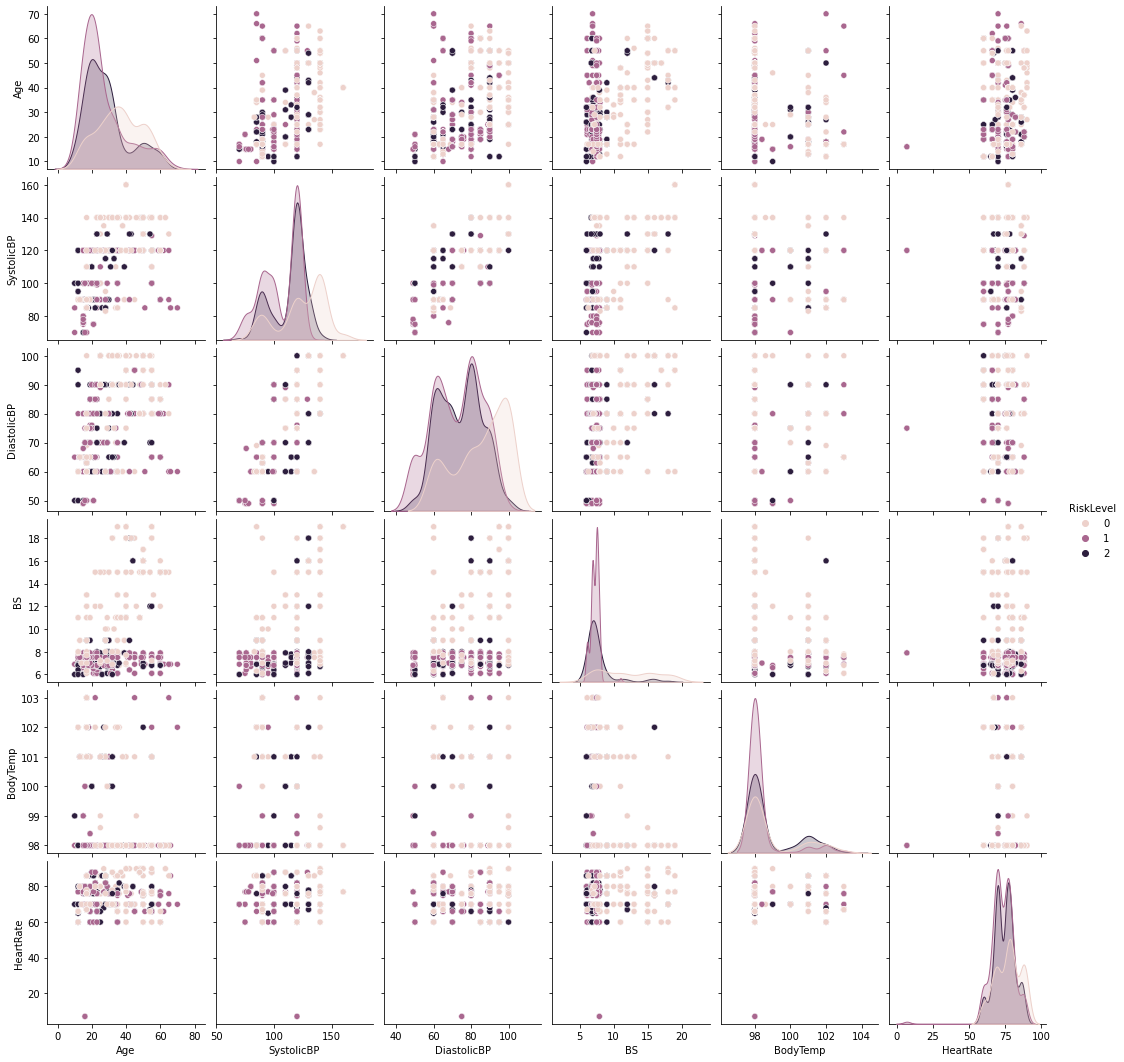

In [ ]:
sns.pairplot(df, hue="RiskLevel")
plt.show()

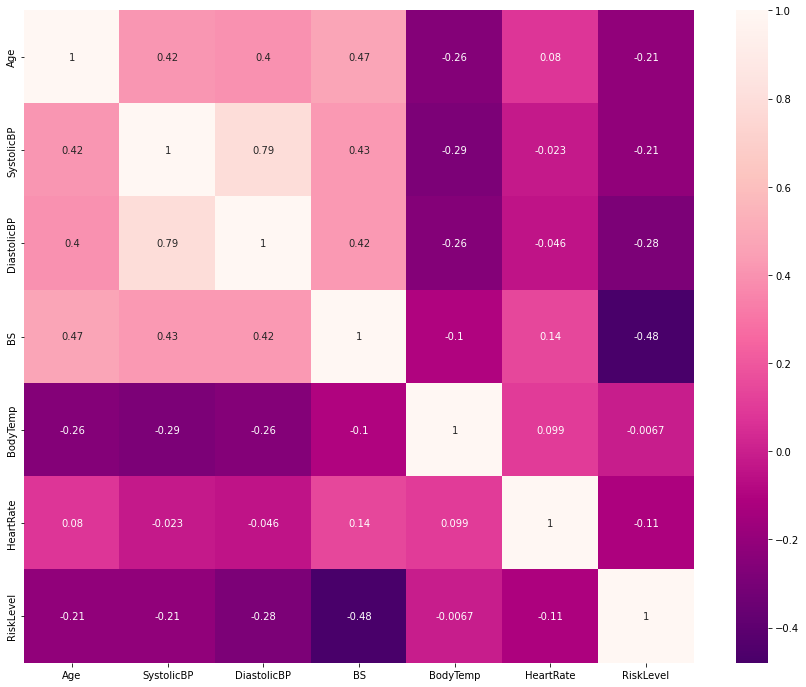

In [ ]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True,cmap='RdPu_r')
plt.show()

# Data Preprocessing

In [ ]:
df.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

Since we do not have any missing data and our features aren't categorical except the labels, only thing we need to do is standardize our data and then we are ready to the learning.

In [ ]:
from sklearn.model_selection import train_test_split
y = df['RiskLevel']
X = df.drop('RiskLevel', axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['RiskLevel'] = le.fit_transform(df['RiskLevel'])
df.head(10)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.00,98.0,86,0
1,35,140,90,13.00,98.0,70,0
2,29,90,70,8.00,100.0,80,0
3,30,140,85,7.00,98.0,70,0
4,35,120,60,6.10,98.0,76,1
5,23,140,80,7.01,98.0,70,0
6,23,130,70,7.01,98.0,78,2
7,35,85,60,11.00,102.0,86,0
8,32,120,90,6.90,98.0,70,2
9,42,130,80,18.00,98.0,70,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=102, test_size = 0.3)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### There are a few methods to find the best hyperparameters for models. we can set them manually which can be time devastating and may not even lead to agreat result. There are two more ways in Scikit-learn for hypertuning one is GridSearch and the other one is RandomizeSearch. For every model I will first use GridSearch to find out the best and the most optimized hyperparameters and then train the model and use Cross Validation to a more trustable accuracy.

# ✅Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV
dtc_param_dic = {
    "criterion" : ['gini', 'entropy'],
    "max_depth" : range(1,20),
    "min_samples_split" : range(1,20),
    "min_samples_leaf" : range(1,20)
}
grid = GridSearchCV(dtc, 
                    param_grid = dtc_param_dic,
                    cv = 10,
                    verbose = 1,
                    n_jobs = -1)
grid.fit(X_train, y_train)

Fitting 10 folds for each of 13718 candidates, totalling 137180 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
7220 fits failed out of a total of 137180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7220 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 254, in fit
    % self.min_samples_split
ValueError: min_samples_split must be an integer greater than 1 or a

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 20),
                         'min_samples_leaf': range(1, 20),
                         'min_samples_split': range(1, 20)},
             verbose=1)

In [ ]:
print("best parameters: ", grid.best_params_)
print("best estimator: ", grid.best_estimator_)
print("best score: ", grid.best_score_)

best parameters:  {'criterion': 'gini', 'max_depth': 17, 'min_samples_leaf': 1, 'min_samples_split': 2}
best estimator:  DecisionTreeClassifier(max_depth=17)
best score:  0.8137625754527162


In [ ]:
dtc = DecisionTreeClassifier(max_depth=15)
dtc.fit(X_train, y_train)
y_pred_train_dtc = dtc.predict(X_train)
y_pred_test_dtc = dtc.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_train_dtc = accuracy_score(y_train, y_pred_train_dtc)
accuracy_test_dtc = accuracy_score(y_test, y_pred_test_dtc)
conf = confusion_matrix(y_test, y_pred_test_dtc)
clf = classification_report(y_test, y_pred_test_dtc)
accuracy_test_dtc

0.8524590163934426

In [ ]:
from sklearn.model_selection import cross_val_score
scores_dtc = cross_val_score(dtc, X_train, y_train, cv=5)
print(scores_dtc.mean())

0.7997003296373988


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


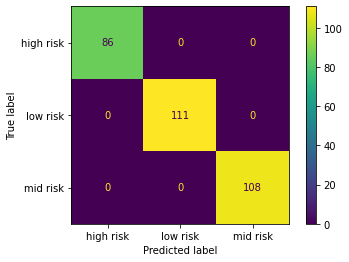

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dtc, X_test, y_pred_test_dtc)

In [ ]:
print(clf)

              precision    recall  f1-score   support

   high risk       0.92      0.93      0.92        85
    low risk       0.87      0.82      0.84       119
    mid risk       0.78      0.83      0.80       101

    accuracy                           0.85       305
   macro avg       0.86      0.86      0.86       305
weighted avg       0.85      0.85      0.85       305



# ✅KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [ ]:
grid_params_knn = { 'n_neighbors' : [1,5,7,9,11,13,15,20,22,26,35,50,70],
}
grid_knn = GridSearchCV(KNeighborsClassifier(), 
                        grid_params_knn, 
                        verbose = 1, 
                        cv=7, 
                        n_jobs = -1)
grid_res_knn = grid_knn.fit(X_train, y_train)

Fitting 7 folds for each of 13 candidates, totalling 91 fits


In [ ]:
print(grid_res_knn.best_params_)
print(grid_res_knn.best_estimator_)
print("knn best score: ", grid_res_knn.best_score_)

{'n_neighbors': 1}
KNeighborsClassifier(n_neighbors=1)
knn best score:  0.7870177774079928


In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred_train_knn = knn.predict(X_train)
y_pred_test_knn = knn.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_train_knn = accuracy_score(y_train, y_pred_train_knn)
accuracy_test_knn = accuracy_score(y_test, y_pred_test_knn)
conf_knn = confusion_matrix(y_test, y_pred_test_knn)
clf_knn = classification_report(y_test, y_pred_test_knn)
accuracy_test_knn

0.8

In [ ]:
scores_knn = cross_val_score(knn, X_train, y_train, cv=5)
print(scores_knn.mean())

0.7714713814803715


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


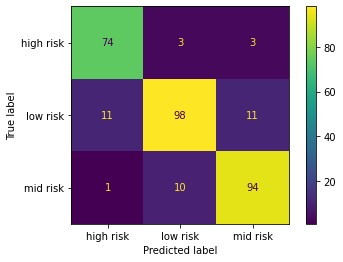

In [ ]:
plot_confusion_matrix(dtc, X_test, y_pred_test_knn)

# ✅SVM

In [ ]:
from sklearn.svm import SVC
svm = SVC()

In [ ]:
param_grid_svm = {'C': [0.1,1, 10, 100], 
              'gamma': [1,0.1,0.01,0.001],
              'kernel': ['rbf', 'poly', 'sigmoid']}
grid_svm = GridSearchCV(svm,
                        param_grid = param_grid_svm,
                        cv = 5,
                        verbose = 2,
                        n_jobs = -1)
grid_res_svm = grid_svm.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [ ]:
print(grid_res_svm.best_params_)
print(grid_res_svm.best_estimator_)
print("knn best score: ", grid_res_svm.best_score_)

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=100, gamma=1)
knn best score:  0.7531441521961185


In [ ]:
svm = SVC(C=100, gamma=1)
svm.fit(X_train, y_train)
y_pred_train_svm = svm.predict(X_train)
y_pred_test_svm = svm.predict(X_test)

In [ ]:
accuracy_train_svm = accuracy_score(y_train, y_pred_train_svm)
accuracy_test_svm = accuracy_score(y_test, y_pred_test_svm)
conf_svm = confusion_matrix(y_test, y_pred_test_svm)
clf_svm = classification_report(y_test, y_pred_test_svm)
accuracy_test_svm

0.7672131147540984

In [ ]:
scores_svm = cross_val_score(svm, X_train, y_train, cv=5)
print(scores_svm.mean())

0.7545400059934073


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


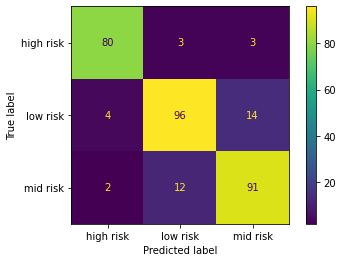

In [ ]:
plot_confusion_matrix(dtc, X_test, y_pred_test_svm)

# ✅Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [ ]:
param_grid_rfc = {'n_estimators': [35,50,70,100,150],
                  'max_features': ['auto', 'sqrt', 'log2'],
                  'max_depth' : [8,10,12,13,15],
                  'min_samples_leaf': [1,2,3,4],
                  'min_samples_split': [2,4,8,10],
                  'criterion' :['gini', 'entropy'],
                  'bootstrap': [True],}
grid_rfc = GridSearchCV(rfc, 
                        param_grid = param_grid_rfc,
                        cv = 3,
                        verbose = 1,
                        n_jobs = -1)
grid_res_rfc = grid_rfc.fit(X_train, y_train)

Fitting 3 folds for each of 2400 candidates, totalling 7200 fits


In [ ]:
print(grid_res_rfc.best_params_)
print(grid_res_rfc.best_estimator_)
print("knn best score: ", grid_res_rfc.best_score_)

{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 12, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
RandomForestClassifier(criterion='entropy', max_depth=12, max_features='log2',
                       n_estimators=50)
knn best score:  0.7799232401249135


In [ ]:
rfc = RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=200)
rfc.fit(X_train, y_train)
y_pred_train_rfc = rfc.predict(X_train)
y_pred_test_rfc = rfc.predict(X_test)

In [ ]:
accuracy_train_rfc = accuracy_score(y_train, y_pred_train_rfc)
accuracy_test_rfc = accuracy_score(y_test, y_pred_test_rfc)
conf_rfc = confusion_matrix(y_test, y_pred_test_svm)
clf_rfc = classification_report(y_test, y_pred_test_rfc)
accuracy_test_rfc

0.8459016393442623

In [ ]:
scores_rfc = cross_val_score(rfc, X_train, y_train, cv=5)
print(scores_rfc.mean())

0.7573569074018579


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


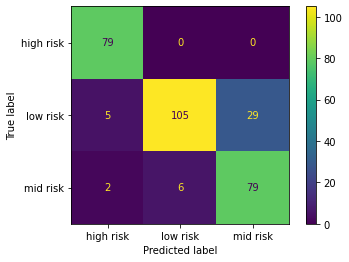

In [ ]:
plot_confusion_matrix(dtc, X_test, y_pred_test_rfc)

In [ ]:
results = pd.DataFrame({'Model' : ['Decision Tree', 'KNN', 'SVM', 'Random Forest'],
                        'Train Acc' : [accuracy_train_dtc, accuracy_train_knn, accuracy_train_svm, accuracy_train_rfc],
                        'Test Acc' : [accuracy_test_dtc, accuracy_test_knn, accuracy_test_svm, accuracy_test_rfc],
                        'CV Acc' : [scores_dtc.mean(), scores_knn.mean(), scores_svm.mean(),scores_rfc.mean()]
                        })
results

,Model,Train Acc,Test Acc,CV Acc
0,Decision Tree,0.925247,0.852459,0.799700
1,KNN,0.908322,0.800000,0.771471
2,SVM,0.891396,0.767213,0.754540
3,Random Forest,0.870240,0.845902,0.757357


### As we can see Decision Tree has the highest score in train accuracy and to be honest it is a little bit overfit according to its test accuracy. Random Forest as we could expect has the smallest difference between its test and train accuracy and in some ways we can say it's more robust comparing to the other algorithms. Since the most trustable accuracy in this table is somehow the cross validation accuracy we can kinda say that Decision Tree and KNN was decest choised for our prediction.